In [1]:
!pwd

/home/jupyter/drone/transfer


In [2]:
import time
import glob
import torch
import os 

In [3]:
from IPython.display import Image, clear_output
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.1.0 CPU


In [4]:
!pip install cython
!pip install nvidia-ml-py3
!pip install -U -r requirements.txt

  Stored in directory: /home/jupyter/.cache/pip/wheels/e4/1d/06/640c93f5270d67d0247f30be91f232700d19023f9e66d735c7
Successfully built nvidia-ml-py3
    100% |████████████████████████████████| 20.3MB 1.9MB/s 
Requirement already up-to-date: opencv-python in /opt/anaconda3/lib/python3.7/site-packages (from -r requirements.txt (line 7)) (4.1.0.25)
    100% |████████████████████████████████| 748.9MB 54kB/s 
    100% |████████████████████████████████| 13.1MB 5.6MB/s 
    100% |████████████████████████████████| 1.5MB 25.6MB/s 
    100% |████████████████████████████████| 51kB 21.2MB/s 
    100% |████████████████████████████████| 3.8MB 12.6MB/s 
Requirement already up-to-date: future in /opt/anaconda3/lib/python3.7/site-packages (from -r requirements.txt (line 13)) (0.17.1)
    100% |████████████████████████████████| 583kB 33.0MB/s 
    100% |████████████████████████████████| 102kB 29.6MB/s 
  Stored in directory: /home/jupyter/.cache/pip/wheels/dc/e6/36/0e1ae88c868eb42d3f92181b1c9bbd0b217a7ec

In [12]:
!sudo python3 train.py --cfg cfg/plane-drone.cfg --epochs 1 --batch-size 5 --data data/plane_drone_val.data

Namespace(accumulate=2, batch_size=5, bucket='', cache_images=False, cfg='cfg/plane-drone.cfg', data='data/plane_drone_val.data', epochs=1, evolve=False, img_size=416, img_weights=False, multi_scale=False, nosave=False, notest=False, num_workers=8, rect=False, resume=False, transfer=False, xywh=False)
Using CPU

data/plane_drone_train.txt
[]
Model Summary: 222 layers, 6.15291e+07 parameters, 6.15291e+07 gradients

     Epoch   gpu_mem   GIoU/xy        wh       obj       cls     total   targets  img_size
       0/0        0G     0.205         0     0.759      5.22      6.19         1       416: 100%|█| 143/143 [17:23<00:00,  5.65s/it]
data/plane_drone_val.txt
[]
                         Class    Images   Targets         P         R       mAP        F1: 100%|█| 61/61 [01:24<00:00,  1.36s/it]
                           all       301       418    0.0323   0.00376   0.00117   0.00673
1 epochs completed in 0.314 hours.


In [1]:
!sudo python3 test.py --data data/plane_drone_val.data --cfg cfg/plane-drone.cfg --weights weights/best.pt --save-json --img-size 416 --batch-size 10

Namespace(batch_size=10, cfg='cfg/plane-drone.cfg', conf_thres=0.001, data='data/plane_drone_val.data', img_size=416, iou_thres=0.5, nms_thres=0.5, save_json=True, weights='weights/best.pt')
Using CPU

data/plane_drone_val.txt
[]
                         Class    Images   Targets         P         R       mAP        F1: 100%|█| 31/31 [01:47<00:00,  3.19s/it]
                           all       301       418   0.00057    0.0475   0.00145   0.00113
                         drone       301       152  0.000142    0.0197  4.65e-06  0.000281
                      airplane       301       266  0.000999    0.0752   0.00289   0.00197
loading annotations into memory...
Traceback (most recent call last):
  File "test.py", line 219, in <module>
    opt.save_json)
  File "test.py", line 179, in test
    cocoGt = COCO('../coco/annotations/instances_val2014.json')  # initialize COCO ground truth api
  File "/home/jupyter/drone/transfer/pycocotools/coco.py", line 84, in __init__
    dataset = json.lo

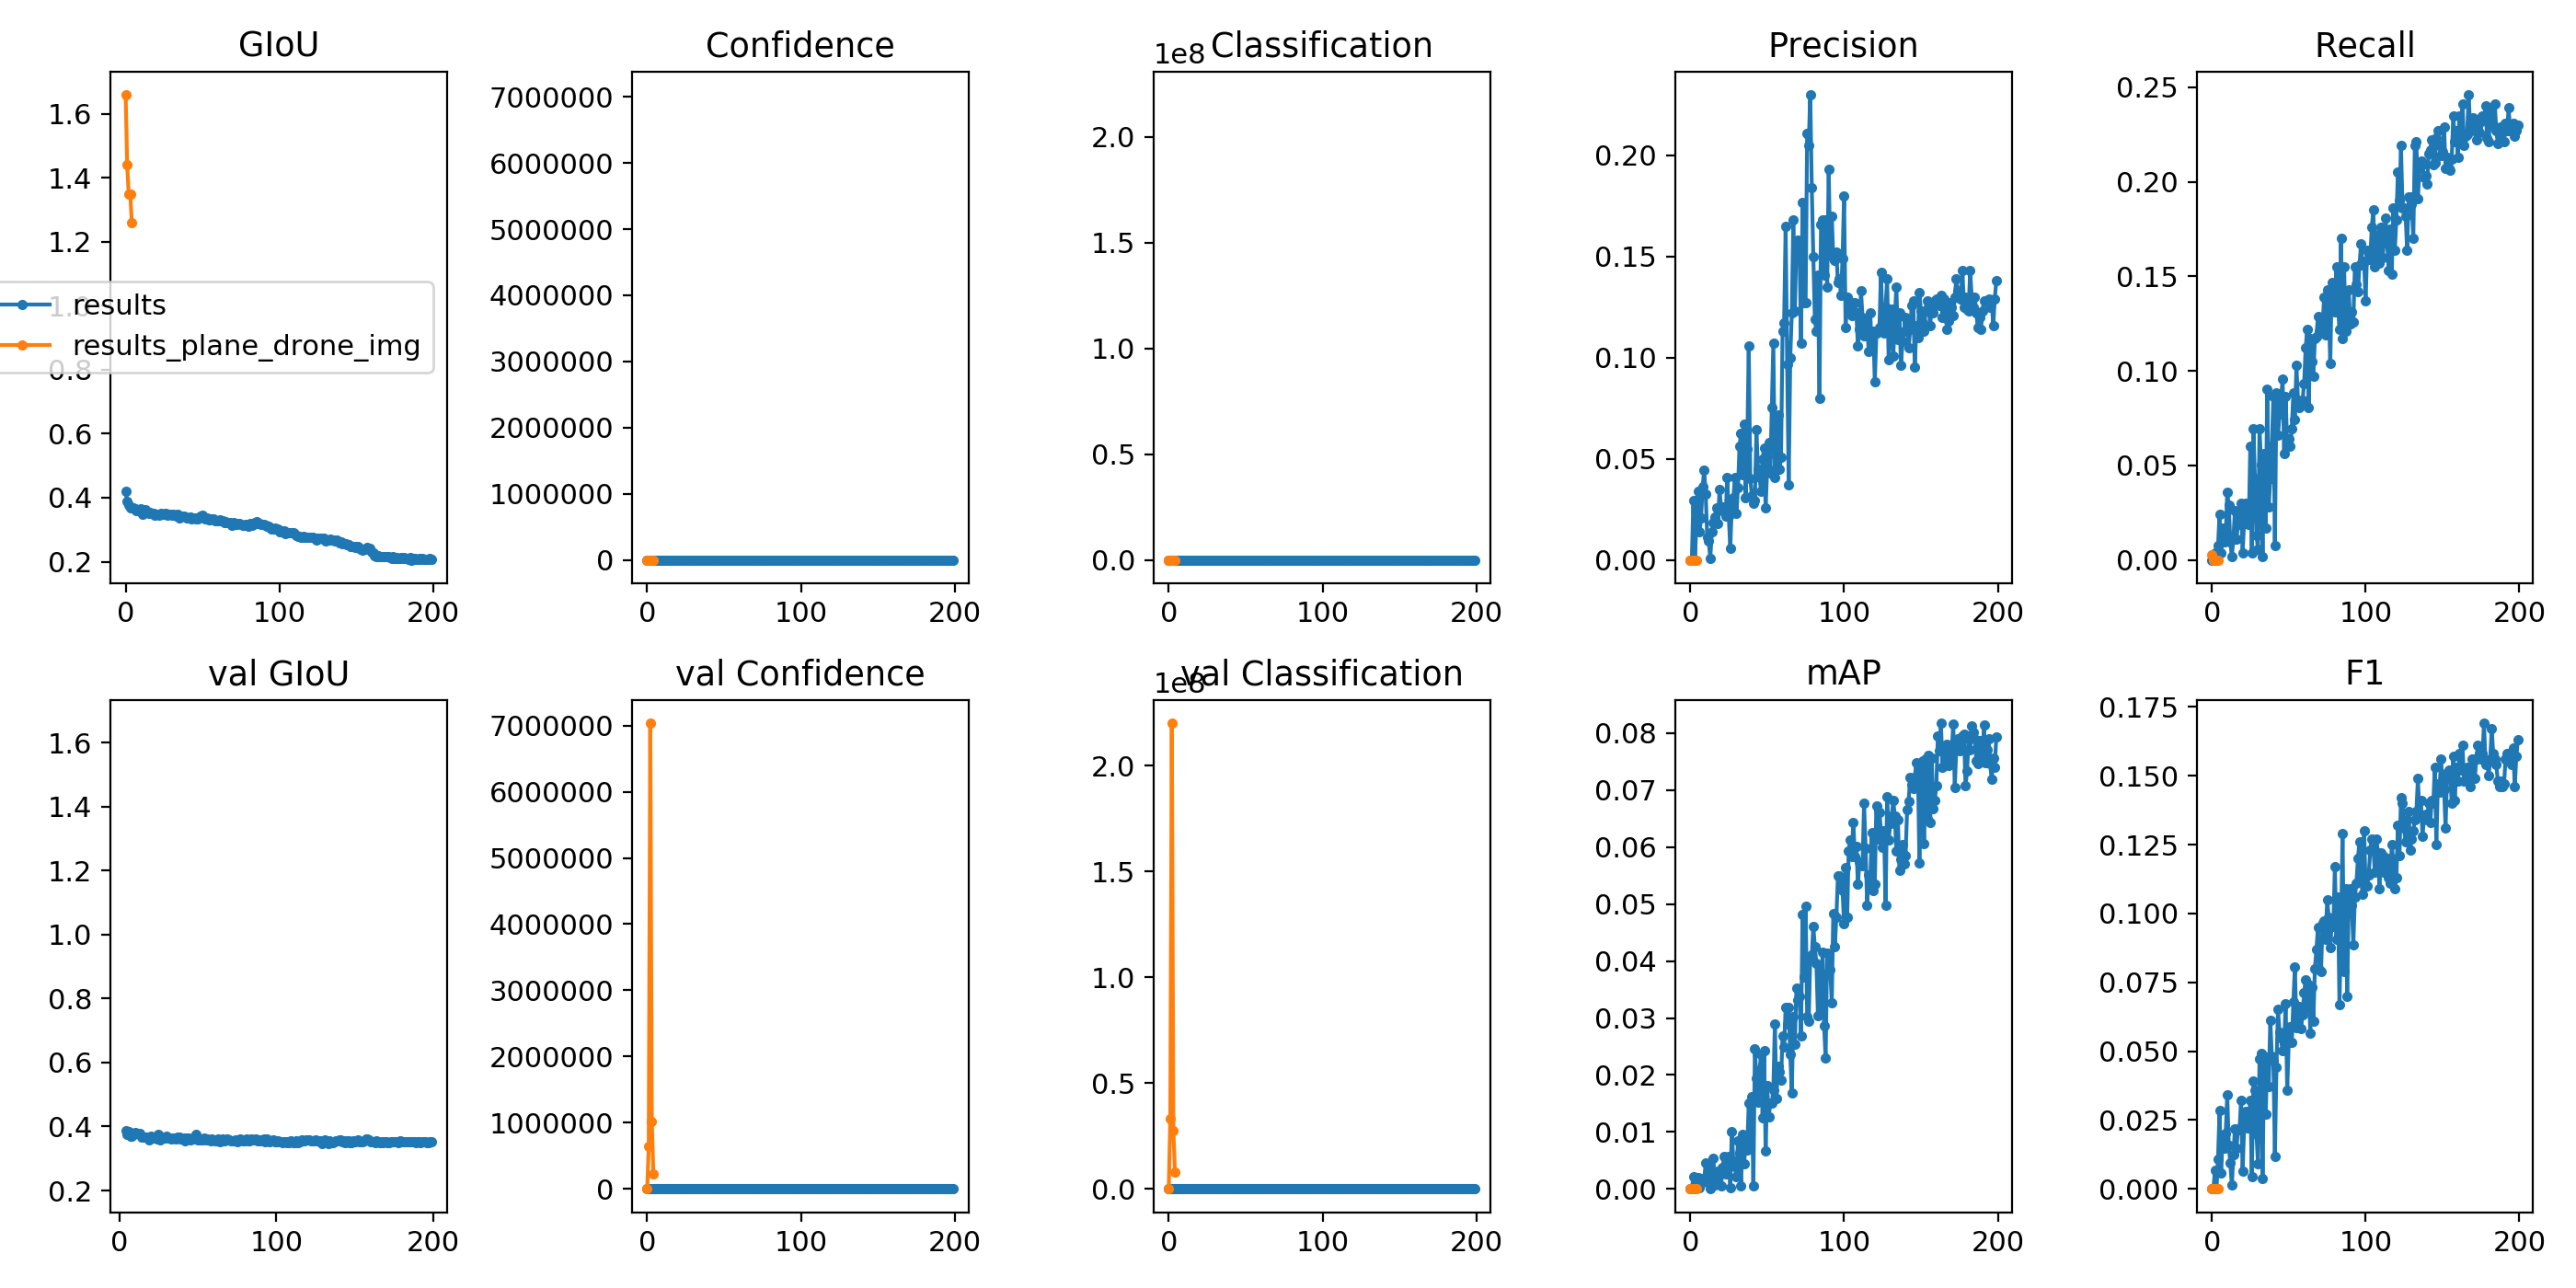

In [12]:
!sudo python3 -c "from utils import utils; utils.plot_results()"
Image(filename='results.png', width=800)

In [ ]:
!python3 detect.py
Image(filename='output/zidane.jpg', width=600)